In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('Company Stock and Investment.csv')
df

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


In [3]:
df_gold = df.drop(['Oil Investments','Comp Stock','Other sharesInvestments'],axis=1)
df_gold

,Date,Gold Investments
0,31-12-2009,0.000150
1,04-01-2010,0.001097
2,05-01-2010,0.001560
3,06-01-2010,0.006009
4,07-01-2010,0.000221
...,...,...
1979,09-11-2017,0.000623
1980,10-11-2017,-0.000389
1981,13-11-2017,-0.004944
1982,14-11-2017,-0.002621


In [4]:
df_gold.isnull().sum()

Date                0
Gold Investments    0
dtype: int64

In [5]:
df_gold['Date']=pd.to_datetime(df_gold['Date'],format='%d-%m-%Y')

In [6]:
df_gold.set_index('Date',inplace=True)

In [7]:
df_gold

,Gold Investments
Date,
2009-12-31,0.000150
2010-01-04,0.001097
2010-01-05,0.001560
2010-01-06,0.006009
2010-01-07,0.000221
...,...
2017-11-09,0.000623
2017-11-10,-0.000389
2017-11-13,-0.004944


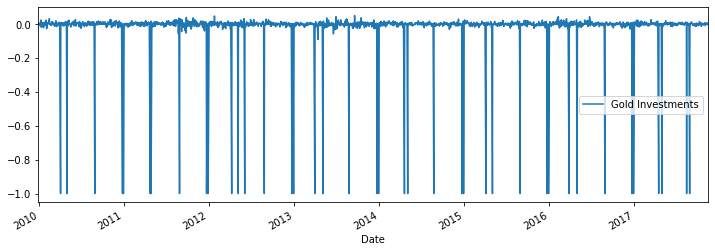

In [8]:
df_gold.plot(figsize=(12,4))

In [9]:
from statsmodels.tsa.stattools import adfuller
def adf_test(price):
    result=adfuller(price) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [10]:
adf_test(df_gold['Gold Investments'])

ADF Test Statistic : -15.906853851669018
p-value : 8.208405770369596e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


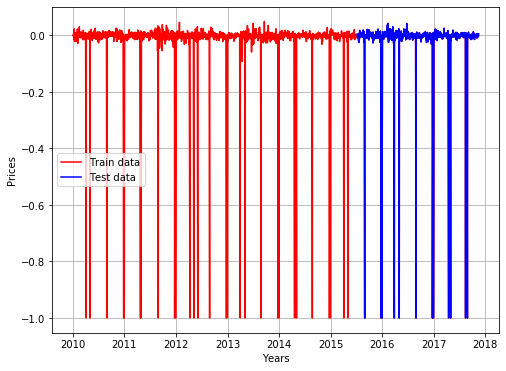

In [11]:
size=int(len(df)*0.70)
train_data, test_data = df_gold[0:size], df_gold[size:]
plt.figure(figsize=(8,6))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Prices')
plt.plot(df_gold,'red',label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [12]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data,order=(5,1,1))
results=model.fit()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Gold Investments   No. Observations:                 1387
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 772.797
Method:                       css-mle   S.D. of innovations              0.138
Date:                Sun, 01 Nov 2020   AIC                          -1529.593
Time:                        17:03:21   BIC                          -1487.714
Sample:                             1   HQIC                         -1513.931
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.582e-06   1.07e-05     -0.334      0.738   -2.46e-05    1.74e-05
ar.L1.D.Gold Investments    -0.0186      0.027     -0.691      0.489      -0.071       0.034
ar.L2.D.Gold Investments    -0.0178      0.026     -0.677      0.499      -0.069       0.034
ar.L3.D.Gold Investments    -0.0093      0.026     -0.354      0.723      -0.061       0.042
ar.L4.D.Gold Investments     0.1944      0.026      7.388      0.000       0.143       0.246
ar.L5.D.Gold Investments    -0.0133      0.027     -0.496      0.620      -0.066       0.039
ma.L1.D.Gold Investments    -0.9998      0.002   -540.484      0.000      -1.003      -0.996
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4637           -0.0000j            1.4637           -0.5000
AR.2           -0.0358           -1.4882j            1.4887           -0.2538
AR.3           -0.0358           +1.4882j            1.4887            0.2538
AR.4            1.5918           -0.0000j            1.5918           -0.0000
AR.5           14.5521           -0.0000j           14.5521           -0.0000
MA.1            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""

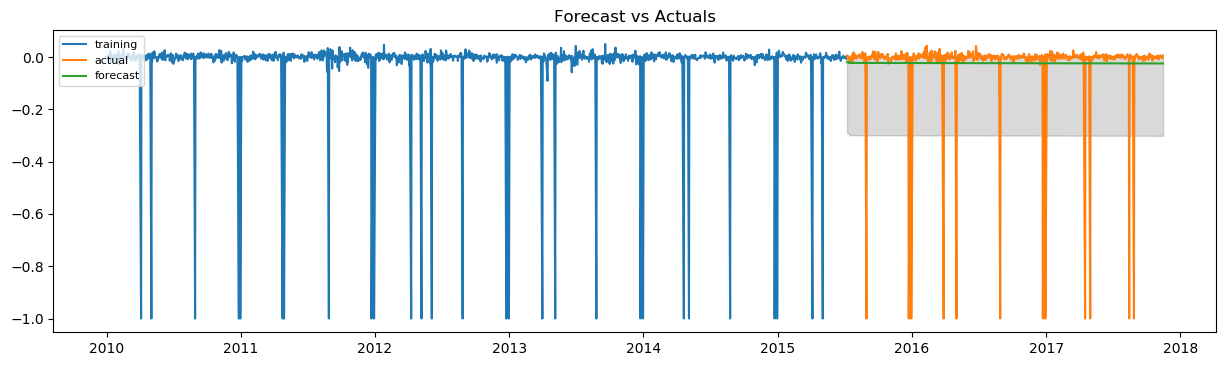

In [14]:
fc, se, conf = results.forecast(596, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(15,4), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [15]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

MSE: 0.019828077330809744
MAE: 0.04310527910004959
RMSE: 0.14081220590136972


In [16]:
fc_series

Date
2015-07-09   -0.019937
2015-07-10   -0.019053
2015-07-13   -0.020570
2015-07-14   -0.018232
2015-07-15   -0.022652
                ...   
2017-11-09   -0.024807
2017-11-10   -0.024811
2017-11-13   -0.024814
2017-11-14   -0.024818
2017-11-15   -0.024821
Length: 596, dtype: float64

In [26]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_gold.index[-1]+ DateOffset(months=x)for x in range(0,36)]

In [27]:
df_gold_future=pd.DataFrame(index=future_dates[1:],columns=df_gold.columns)

In [28]:
df_gold_future.tail()

,Gold Investments
2020-06-15,NaN
2020-07-15,NaN
2020-08-15,NaN
2020-09-15,NaN
2020-10-15,NaN


In [29]:
fc1, se1, conf1 = results.forecast(35, alpha=0.05)  # 95% confidence
fc1_series = pd.Series(fc1, index=df_gold_future.index)
fc1_series

2017-12-15   -0.019937
2018-01-15   -0.019053
2018-02-15   -0.020570
2018-03-15   -0.018232
2018-04-15   -0.022652
2018-05-15   -0.022137
2018-06-15   -0.022400
2018-07-15   -0.021891
2018-08-15   -0.022794
2018-09-15   -0.022628
2018-10-15   -0.022681
2018-11-15   -0.022575
2018-12-15   -0.022763
2019-01-15   -0.022720
2019-02-15   -0.022734
2019-03-15   -0.022715
2019-04-15   -0.022756
2019-05-15   -0.022748
2019-06-15   -0.022754
2019-07-15   -0.022753
2019-08-15   -0.022764
2019-09-15   -0.022765
2019-10-15   -0.022769
2019-11-15   -0.022772
2019-12-15   -0.022777
2020-01-15   -0.022780
2020-02-15   -0.022783
2020-03-15   -0.022787
2020-04-15   -0.022791
2020-05-15   -0.022794
2020-06-15   -0.022798
2020-07-15   -0.022801
2020-08-15   -0.022805
2020-09-15   -0.022808
2020-10-15   -0.022812
dtype: float64

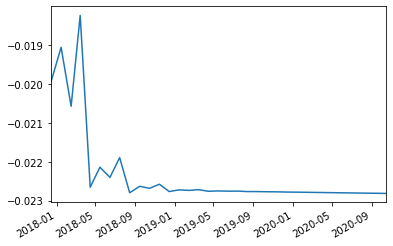

In [30]:
fc1_series.plot()